In [123]:
import warnings 
warnings.simplefilter('ignore')


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [125]:
df=pd.read_csv('day.csv')

In [126]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [127]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [128]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [130]:
#season,#year,
#month
#holiday
#day of the week
#weathersit
# distplot temp,atemp,hum,windspeed.
#add the dummy columns.
#drop casual and register.



In [131]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [132]:
## transforming the season column into categorical variables.
def change(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'
    
df['season']=df['season'].apply(change)

In [133]:
df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [134]:
## encoding the year variable.
def ychange(x):
    if x==0:
        return '2018'
    else:
        return '2019'

    df['yr']=df['yr'].apply(ychange)

In [135]:
df['yr'].value_counts()

1    365
0    365
Name: yr, dtype: int64

In [136]:
#converting the month column
def obj_map(x):
    return x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

df[['mnth']]=df[['mnth']].apply(obj_map)

In [137]:
## encoding the weekvariable.
def weekchange(x):
    return x.map({1:'monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'})

df[['weekday']]=df[['weekday']].apply(weekchange)

In [138]:
df['weekday'].value_counts()

Tuesday      105
monday       105
Thursday     104
Wednesday    104
Friday       104
Saturday     104
Name: weekday, dtype: int64

In [139]:
#encoding the holiday type.
def holidaych(x):
    if x==0:
        return 'no'
    else:
        return 'yes'
    
df['holiday']=df['holiday'].apply(holidaych)

In [140]:
df['holiday'].value_counts()

no     709
yes     21
Name: holiday, dtype: int64

In [141]:
## encoding the weather variable.
def weatherch(x):
    return x.map({1:'Clear',2:'Mist',3:'Light snow',4:'Heavy Rain'})

df[['weathersit']]=df[['weathersit']].apply(weatherch)

In [142]:
df['weathersit'].value_counts()

Clear         463
Mist          246
Light snow     21
Name: weathersit, dtype: int64

In [143]:
## encoding the working day variable

def workdaych(x):
    if x==1:
        return 'workday'
    else:
        return 'not-workday'
    
df['workingday']=df['workingday'].apply(workdaych)

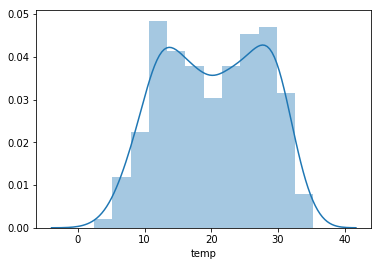

In [144]:
#distplot of temperature.
sns.distplot(df['temp'])
plt.show()

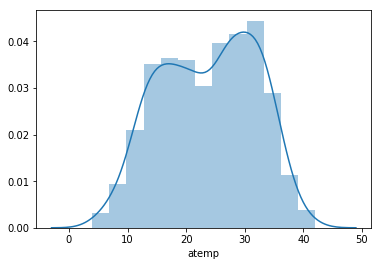

In [145]:
#distribution of atemp
sns.distplot(df['atemp'])
plt.show()

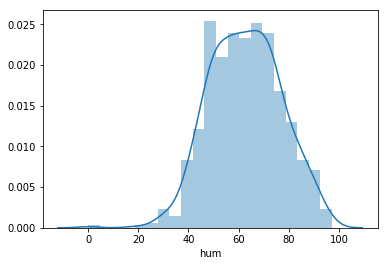

In [146]:
#distribution of humidity
sns.distplot(df['hum'])
plt.show()

In [147]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

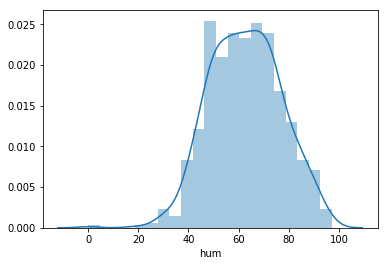

In [148]:
#distribution of windspeed
sns.distplot(df['hum'])
plt.show()

converting the dteday into datetime format.

In [149]:
df['dteday']=df['dteday'].astype('datetime64')

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null datetime64[ns]
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null object
weekday       626 non-null object
workingday    730 non-null object
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(5), object(6)
memory usage: 91.3+ KB


In [151]:
#converting year column into object type.
df['yr']=df['yr'].astype('object')

In [152]:
df_categorical=df.select_dtypes(exclude=['float64','datetime64','int64'])

In [153]:
df_categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

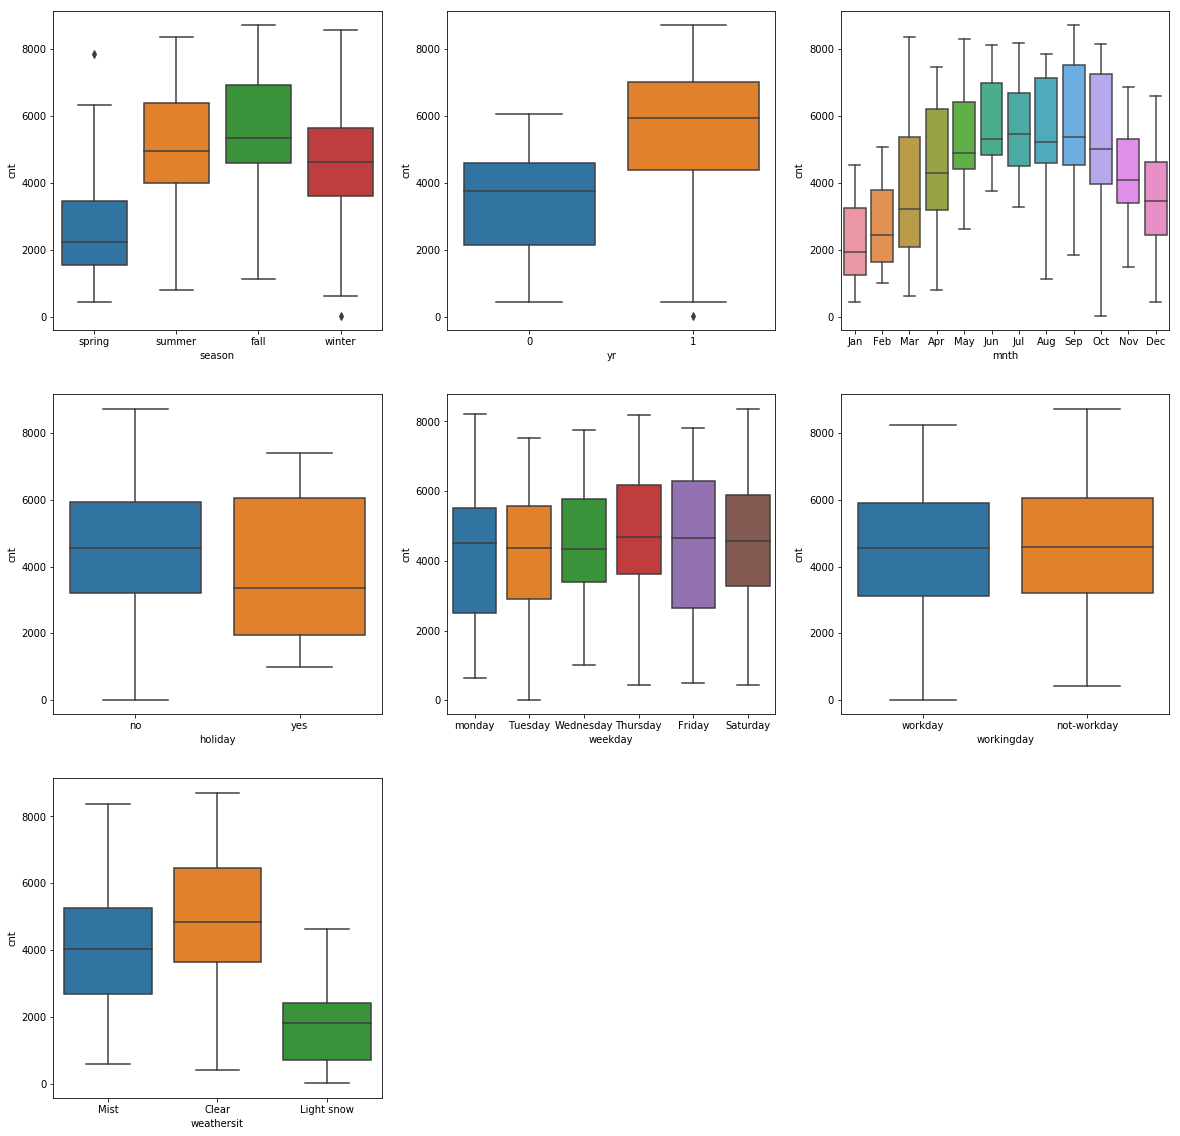

In [154]:

## generating the boxplots with respect to the count variable.
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=df)
plt.show()

In [155]:
## observation to be written about the outliers in the columns.


In [156]:
## converting the numeric column sto float.
float_var=[ 'casual', 'registered','cnt']

for var in float_var:
    df[var]=df[var].astype(float)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null datetime64[ns]
season        730 non-null object
yr            730 non-null object
mnth          730 non-null object
holiday       730 non-null object
weekday       626 non-null object
workingday    730 non-null object
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null float64
registered    730 non-null float64
cnt           730 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(1), object(7)
memory usage: 91.3+ KB


In [158]:
df_numeric=df.select_dtypes(include=['float64'])
df_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


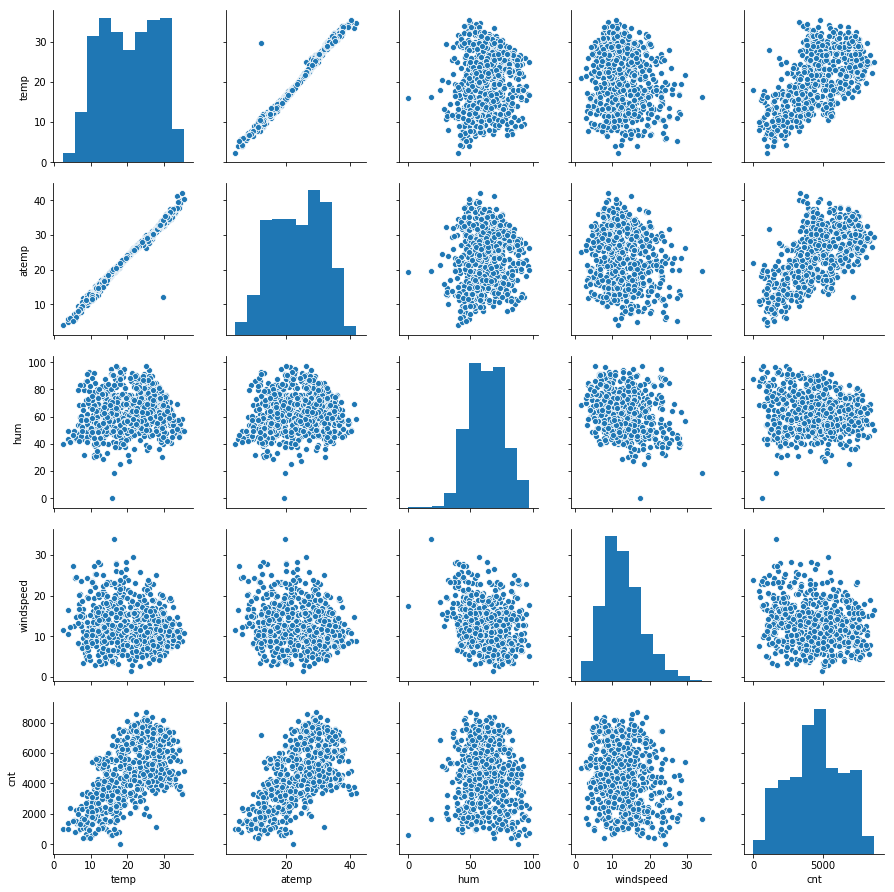

In [159]:
# plotting the pairplots between the numeric variables.
sns.pairplot(df_numeric[['temp','atemp','hum','windspeed','cnt']])

In [160]:
## inferences about the correlation.

In [161]:
# correlation matrix
cor=df_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


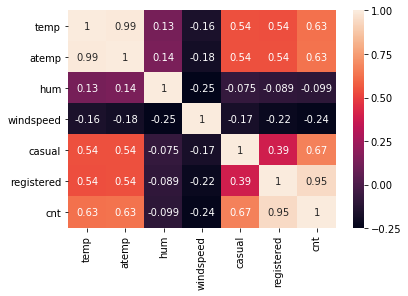

In [162]:
sns.heatmap(cor,annot=True)

In [163]:
## since the correlation between the registered and count is very high dropping the column will be the best way.
df=df.drop(['registered'],axis=1)

In [164]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,cnt
0,1,2018-01-01,spring,0,Jan,no,monday,workday,Mist,14.110847,18.18125,80.5833,10.749882,331.0,985.0
1,2,2018-02-01,spring,0,Jan,no,Tuesday,workday,Mist,14.902598,17.68695,69.6087,16.652113,131.0,801.0
2,3,2018-03-01,spring,0,Jan,no,Wednesday,workday,Clear,8.050924,9.47025,43.7273,16.636703,120.0,1349.0
3,4,2018-04-01,spring,0,Jan,no,Thursday,workday,Clear,8.200000,10.60610,59.0435,10.739832,108.0,1562.0
4,5,2018-05-01,spring,0,Jan,no,Friday,workday,Clear,9.305237,11.46350,43.6957,12.522300,82.0,1600.0


In [165]:
df_categorical=df.select_dtypes(include=['object'])
df_categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [166]:
## hard encoding by using the get_dummies()method.
df_dummies=pd.get_dummies(df_categorical,drop_first=True)
df_dummies.head()

,season_spring,season_summer,season_winter,yr_1,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,mnth_Sep,holiday_yes,weekday_Saturday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weekday_monday,workingday_workday,weathersit_Light snow,weathersit_Mist
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [167]:
df_categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [168]:
df=df.drop(df_categorical.columns,axis=1)
df.columns

Index(['instant', 'dteday', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'cnt'],
      dtype='object')

In [169]:
df=pd.concat([df,df_dummies],axis=1)

In [170]:
df.head()

,instant,dteday,temp,atemp,hum,windspeed,casual,cnt,season_spring,season_summer,...,mnth_Sep,holiday_yes,weekday_Saturday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weekday_monday,workingday_workday,weathersit_Light snow,weathersit_Mist
0,1,2018-01-01,14.110847,18.18125,80.5833,10.749882,331.0,985.0,1,0,...,0,0,0,0,0,0,1,1,0,1
1,2,2018-02-01,14.902598,17.68695,69.6087,16.652113,131.0,801.0,1,0,...,0,0,0,0,1,0,0,1,0,1
2,3,2018-03-01,8.050924,9.47025,43.7273,16.636703,120.0,1349.0,1,0,...,0,0,0,0,0,1,0,1,0,0
3,4,2018-04-01,8.200000,10.60610,59.0435,10.739832,108.0,1562.0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,5,2018-05-01,9.305237,11.46350,43.6957,12.522300,82.0,1600.0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [171]:
df=df.drop(['instant','dteday'],axis=1)
df.head()

,temp,atemp,hum,windspeed,casual,cnt,season_spring,season_summer,season_winter,yr_1,...,mnth_Sep,holiday_yes,weekday_Saturday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weekday_monday,workingday_workday,weathersit_Light snow,weathersit_Mist
0,14.110847,18.18125,80.5833,10.749882,331.0,985.0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,1
1,14.902598,17.68695,69.6087,16.652113,131.0,801.0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2,8.050924,9.47025,43.7273,16.636703,120.0,1349.0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,8.200000,10.60610,59.0435,10.739832,108.0,1562.0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,82.0,1600.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [172]:
#dropping the casual column.
df=df.drop(['atemp','casual'],axis=1)
df.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_1,mnth_Aug,mnth_Dec,...,mnth_Sep,holiday_yes,weekday_Saturday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weekday_monday,workingday_workday,weathersit_Light snow,weathersit_Mist
0,14.110847,80.5833,10.749882,985.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
1,14.902598,69.6087,16.652113,801.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2,8.050924,43.7273,16.636703,1349.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,8.200000,59.0435,10.739832,1562.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [173]:
X=df.drop('cnt',axis=1)
y=df['cnt']

In [174]:
X.shape

(730, 27)

In [175]:
y.shape

(730,)

In [176]:
#dividing the data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [178]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()

scaling of the numerical features

In [179]:
X_train.head()

,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_1,mnth_Aug,mnth_Dec,mnth_Feb,...,mnth_Sep,holiday_yes,weekday_Saturday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weekday_monday,workingday_workday,weathersit_Light snow,weathersit_Mist
367,6.150000,44.1250,24.499957,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
648,17.835000,46.3333,12.166932,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
44,17.015000,37.5833,27.999836,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
705,13.154153,76.4167,8.750200,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
379,6.833347,41.9167,16.834286,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [180]:
## scaling the columns which will result in values between 0 and 1.
var=['temp','hum','windspeed']
X_train[var]=scalar.fit_transform(X_train[var])

In [181]:
X_train.head()

,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_1,mnth_Aug,mnth_Dec,mnth_Feb,...,mnth_Sep,holiday_yes,weekday_Saturday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weekday_monday,workingday_workday,weathersit_Light snow,weathersit_Mist
367,0.113228,0.454701,0.695175,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
648,0.468352,0.477458,0.299450,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
44,0.443431,0.387290,0.807474,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
705,0.326094,0.787463,0.189819,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
379,0.133996,0.431945,0.449210,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [182]:
## Training and making predictions.

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [183]:
coeff_df=pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficients'])
coeff_df

,Coefficients
temp,3882.581793
hum,-1302.989129
windspeed,-1544.191182
season_spring,-486.908211
season_summer,363.653833
season_winter,954.611870
yr_1,1984.511972
mnth_Aug,165.280287
mnth_Dec,-435.544601
mnth_Feb,-262.882571


In [184]:
regressor.intercept_

3012.5442568489925

In [186]:
var=['temp','hum','windspeed']
X_test[var]=scalar.fit_transform(X_test[var])

In [188]:
# Making predictions

y_pred=regressor.predict(X_test)

In [190]:
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1

,Actual,Predicted
184,6043.0,3584.020262
535,6211.0,7935.176341
299,2659.0,3737.344503
221,4780.0,5531.029189
152,4968.0,5443.129267
404,3830.0,3815.970634
198,4458.0,4406.562422
171,4835.0,4014.402098
512,6043.0,6139.482267
200,4332.0,4912.426700


In [191]:
#Evaluating the algorithm
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Absolute Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 656.4500564379966
Mean squared Error: 722618.0857051213
Root Mean Absolute Error: 850.069459341483


In [192]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.787241561739652

In [194]:
yhat=regressor.predict(X_train)
SS_Residual=sum((y_train-yhat)**2)
SS_Total=sum((y_train-np.mean(y_train))**2)
r_squared=1-(float(SS_Residual))/SS_Total
adjusted_r_squared=1-(1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared,adjusted_r_squared)
#82% expected. 

0.8546522135959781 0.8475939577813942


In [195]:
yhat=regressor.predict(X_test)
SS_Residual=sum((y_test-yhat)**2)
SS_Total=sum((y_test-np.mean(y_test))**2)
r_squared=1-(float(SS_Residual))/SS_Total
adjusted_r_squared=1-(1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared,adjusted_r_squared)
#84% expected

0.787241561739652 0.7385595462055046


In [197]:
## Rfe

from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn import datasets
dataset=datasets.load_iris()
svm=LinearSVC()
#create Rfe model for svm classifer
rfe=RFE(svm,3)
rfe.fit(dataset.data,dataset.target)
#printing the summary for selection of attributes
print(rfe.support_)
print(rfe.ranking_)






[False  True  True  True]
[2 1 1 1]


In [199]:
## RFE of the dataset
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [200]:
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,20)
rfe=rfe.fit(X_train,y_train)

In [202]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_1', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', True, 1),
 ('mnth_Mar', True, 1),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', True, 1),
 ('mnth_Sep', True, 1),
 ('holiday_yes', True, 1),
 ('weekday_Saturday', True, 1),
 ('weekday_Thursday', True, 1),
 ('weekday_Tuesday', True, 1),
 ('weekday_Wednesday', True, 1),
 ('weekday_monday', True, 1),
 ('workingday_workday', True, 1),
 ('weathersit_Light snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [203]:
#Building model using stats model.
X_train_rfe=X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_1,mnth_Aug,mnth_Dec,mnth_Feb,...,mnth_Sep,holiday_yes,weekday_Saturday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weekday_monday,workingday_workday,weathersit_Light snow,weathersit_Mist
367,0.113228,0.454701,0.695175,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
648,0.468352,0.477458,0.299450,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
44,0.443431,0.387290,0.807474,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
705,0.326094,0.787463,0.189819,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
379,0.133996,0.431945,0.449210,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [204]:
def build_model(X,y):
    X=sm.add_constant(X)
    lm=sm.OLS(y,X).fit()
    print(lm.summary())
    return X
def checkVIF(X):
    vif=pd.DataFrame()
    vif['Features']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by="VIF",ascending=False)
    return(vif)

In [205]:
X_train_new=build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     121.1
Date:                Sat, 05 Dec 2020   Prob (F-statistic):          5.59e-213
Time:                        20:24:34   Log-Likelihood:                -4691.7
No. Observations:                 584   AIC:                             9439.
Df Residuals:                     556   BIC:                             9562.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3012.54

In [209]:
## p value greater than 0.05
## dropping one variable at a time.
X_train_new=X_train_rfe.drop(['mnth_Jun'],axis=1)
# creating another model
X_train_new=build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     125.9
Date:                Sat, 05 Dec 2020   Prob (F-statistic):          5.56e-214
Time:                        20:33:06   Log-Likelihood:                -4691.8
No. Observations:                 584   AIC:                             9438.
Df Residuals:                     557   BIC:                             9556.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3049.19

In [210]:
#dropping  weekday_Saturday
X_train_new=X_train_rfe.drop(['weekday_Saturday'],axis=1)
# creating another model
X_train_new=build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     125.9
Date:                Sat, 05 Dec 2020   Prob (F-statistic):          5.65e-214
Time:                        20:34:10   Log-Likelihood:                -4691.9
No. Observations:                 584   AIC:                             9438.
Df Residuals:                     557   BIC:                             9556.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2981.17